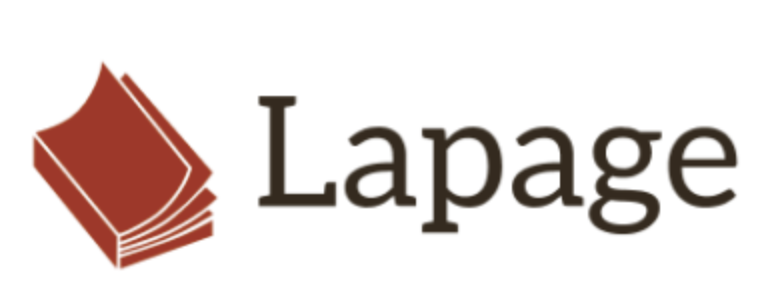
# <center><u> Analysez les ventes d'une librairie avec Python</u></center>
## Première partie: Exploration, nettoyage et analyse des données
### Sommaire

[1.	Importation des bibliothèques](#1.-Importation-des-bibliothèques)

[2.	Importation, exploitation, traitements et analyse des datas frames](#2.-Importation,-exploitation,-traitements-et-analyse-des-datas-frames)

> [2.1. Data frames Customers](#2.1.-Data-frames-Customers)

> [2.2. Data Frames Products](#2.2.-Data-Frames-Products)

> [2.3. Data Frames Transactions](#2.3.-Data-Frames-Transactions)

[3. Rapprochement des data frames (Customers, Products et Transactions)](#3.-Rapprochement-des-data-frames-(Customers,-Products-et-Transactions))

> [3.1. Vérification prix outliers](#3.1.-Vérification-prix-outliers)


[Exportation du Dataframes 'data_lapage'](#Exportation-du-Dataframes-'data_lapage')

### 1.	Importation des bibliothèques

In [1]:
# Importation librairies

import pandas as pd
import numpy as np
import plotly.express as px
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### 2.	Importation, exploitation, traitements et analyse des datas frames

In [2]:
# Importation des datas frames

df_customers = pd.read_csv('customers.csv')
df_products = pd.read_csv('products.csv')
df_transactions = pd.read_csv('transactions.csv')

### 2.1. Data frames Customers

In [3]:
# Aperçu du jeu de données et dimension du data frames Customers

print(df_customers.shape)

df_customers.head()

(8623, 3)


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
# Aperçu des types de données du data frames Customers

df_customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [5]:
# Aperçu des valeurs manquantes au data frames Customers

df_customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [6]:
# Verification de l'existence de doublon dans la data frames Customers

df_customers.duplicated().sum()

0

In [7]:
# Verification de l'unicité de la clé primaire 'client_id'

df_customers.duplicated('client_id').sum()

0

### 2.2. Data Frames Products

In [8]:
# Aperçu du jeu de données et dimension du data frames Products

print(df_products.shape)

df_products.head()

(3287, 3)


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [9]:
# Aperçu des types de données du data frames Products

df_products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [10]:
# Aperçu des valeurs manquantes au data frames Products

df_products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [11]:
# Verification de l'existence de doublon dans la data frames Products

df_products.duplicated().sum()

0

In [12]:
# Verification de l'unicité de la clé primaire 'client_id'

df_products.duplicated('id_prod').sum()

0

### 2.3. Data Frames Transactions

In [13]:
# Aperçu du jeu de données et dimension du data frames Transactions

print(df_transactions.shape)

df_transactions.head()

(679532, 4)


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [14]:
# Aperçu des types de données du data frames Transactions

df_transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [15]:
# Aperçu des valeurs manquantes au data frames Transactions

df_transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [16]:
# Verification de l'existence de doublon dans le data frames Transactions

df_transactions.duplicated().sum()

126

In [17]:
# Vérification de l'unicité de la clé primaire

# Une session pouvant entrainer plusieurs achats, la clé primaire es l’association de la 'date' et de 'client_id'

df_transactions.duplicated(['date', 'client_id']).sum()

126

In [18]:
# Aperçu des lignes en double

df_transactions[df_transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


<b>Les lignes en question semblent être des tests.
Nous pouvons donc nous permettre de procéder à leur suppression.</b>

In [19]:
# Suppression des lignes en double

df_transactions = df_transactions.drop_duplicates()

In [20]:
# Création de mask pour les comptes de test

ct_0 = df_transactions.loc[df_transactions['client_id'] == 'ct_0'].index
ct_1 = df_transactions.loc[df_transactions['client_id'] == 'ct_1'].index

In [21]:
# Suppression des lignes de test

df_transactions.drop(ct_0, inplace=True)

df_transactions.drop(ct_1, inplace=True)

In [22]:
# Réinitialisation des index

df_transactions.reset_index(drop=True)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [23]:
# Changement du format de la date

df_transactions['date'] = df_transactions['date'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [24]:
df_transactions.date = pd.to_datetime(df_transactions.date)

In [25]:
# Creation d'une colonne avec seulement l'année , mois-année et jour-mois-année

df_transactions['date_annee'] = df_transactions['date'].dt.strftime('%Y')

df_transactions['date_mois_annee'] = df_transactions['date'].dt.strftime(
    '%Y-%m')

df_transactions['date_bis'] = df_transactions['date'].dt.strftime('%Y-%m-%d')

### 3. Rapprochement des data frames (Customers, Products et Transactions)

In [26]:
# Rapprochement entre df_customers et df_transactions

data1 = pd.merge(df_customers, df_transactions,
                 on='client_id', how='right') 

In [27]:
# Rapprochement entre data1 et df_products

data_lapage = pd.merge(data1, df_products, on='id_prod', how='left', indicator=True)

In [28]:
#Aperçu du jeu de données et dimension de la jointure finale

print(data_lapage.shape)
data_lapage.head()

(679332, 12)


,client_id,sex,birth,id_prod,date,session_id,date_annee,date_mois_annee,date_bis,price,categ,_merge
0,c_103,f,1986,0_1518,2022-05-20 13:21:29.043970,s_211425,2022,2022-05,2022-05-20,4.18,0.0,both
1,c_8534,m,1988,1_251,2022-02-02 07:55:19.149409,s_158752,2022,2022-02,2022-02-02,15.99,1.0,both
2,c_6714,f,1968,0_1277,2022-06-18 15:44:33.155329,s_225667,2022,2022-06,2022-06-18,7.99,0.0,both
3,c_6941,m,2000,2_209,2021-06-24 04:19:29.835891,s_52962,2021,2021-06,2021-06-24,69.99,2.0,both
4,c_4232,m,1980,0_1509,2023-01-11 08:22:08.194479,s_325227,2023,2023-01,2023-01-11,4.99,0.0,both


In [29]:
#Aperçu des éléments présentent dans la table transaction et absente de la table product

data_lapage[data_lapage['_merge'] != 'both']

,client_id,sex,birth,id_prod,date,session_id,date_annee,date_mois_annee,date_bis,price,categ,_merge
2633,c_4746,m,1940,0_2245,2022-09-23 07:22:38.636773,s_272266,2022,2022-09,2022-09-23,NaN,NaN,left_only
10103,c_6713,f,1963,0_2245,2022-07-23 09:24:14.133889,s_242482,2022,2022-07,2022-07-23,NaN,NaN,left_only
11723,c_5108,m,1978,0_2245,2022-12-03 03:26:35.696673,s_306338,2022,2022-12,2022-12-03,NaN,NaN,left_only
15670,c_1391,m,1991,0_2245,2021-08-16 11:33:25.481411,s_76493,2021,2021-08,2021-08-16,NaN,NaN,left_only
16372,c_7954,m,1973,0_2245,2022-07-16 05:53:01.627491,s_239078,2022,2022-07,2022-07-16,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
669533,c_131,m,1981,0_2245,2021-08-25 09:06:03.504061,s_80395,2021,2021-08,2021-08-25,NaN,NaN,left_only
670484,c_4167,f,1979,0_2245,2022-03-06 19:59:19.462288,s_175311,2022,2022-03,2022-03-06,NaN,NaN,left_only
671088,c_4453,m,1981,0_2245,2022-05-16 11:35:20.319501,s_209381,2022,2022-05,2022-05-16,NaN,NaN,left_only
675480,c_1098,m,1986,0_2245,2022-02-11 09:05:43.952857,s_163405,2022,2022-02,2022-02-11,NaN,NaN,left_only


In [30]:
# Aperçu des types de données du data frames data_lapage

data_lapage.dtypes

client_id                  object
sex                        object
birth                       int64
id_prod                    object
date               datetime64[ns]
session_id                 object
date_annee                 object
date_mois_annee            object
date_bis                   object
price                     float64
categ                     float64
_merge                   category
dtype: object

In [31]:
# Aperçu des valeurs manquantes au data frames data_lapage

data_lapage.isna().sum()

client_id            0
sex                  0
birth                0
id_prod              0
date                 0
session_id           0
date_annee           0
date_mois_annee      0
date_bis             0
price              221
categ              221
_merge               0
dtype: int64

In [32]:
# Aperçu des lignes ayant des valeurs 'NaN' pour les colonnes 'price' et 'client'

data_lapage[data_lapage['price'].isnull(
) & data_lapage['categ'].isnull()].head()

,client_id,sex,birth,id_prod,date,session_id,date_annee,date_mois_annee,date_bis,price,categ,_merge
2633,c_4746,m,1940,0_2245,2022-09-23 07:22:38.636773,s_272266,2022,2022-09,2022-09-23,NaN,NaN,left_only
10103,c_6713,f,1963,0_2245,2022-07-23 09:24:14.133889,s_242482,2022,2022-07,2022-07-23,NaN,NaN,left_only
11723,c_5108,m,1978,0_2245,2022-12-03 03:26:35.696673,s_306338,2022,2022-12,2022-12-03,NaN,NaN,left_only
15670,c_1391,m,1991,0_2245,2021-08-16 11:33:25.481411,s_76493,2021,2021-08,2021-08-16,NaN,NaN,left_only
16372,c_7954,m,1973,0_2245,2022-07-16 05:53:01.627491,s_239078,2022,2022-07,2022-07-16,NaN,NaN,left_only


In [33]:
# Vérification de l'unicité de la clé primaire

data_lapage.duplicated(['date', 'client_id']).sum()

0

In [34]:
#Aperçu des valeurs unique pour la colonne 'categ'

data_lapage['categ'].unique()

array([ 0.,  1.,  2., nan])

#### Au vu des différentes valeurs de la colonne 'categ' et au vu de la nomenclature des données de la colonne 'id_prod', nous pouvons conclure que l’identifiant '0_2245' appartient à la catégorie 0.
#### Nous allons donc affecter à l’id '0_2245’ l’identifiant '0.0' et lui affecter également le prix médian des prix pour cette catégorie.

In [35]:
# Remplacement des prix NaN par le prix médian 9.99 et les catégories NaN par 0


data_lapage['price'].fillna(
    data_lapage[data_lapage['categ'] == 0.0]['price'].median(), inplace=True)

data_lapage['categ'].fillna(0.0, inplace=True)

In [36]:
# Verification de l'existence de doublon dans le data frames data_lapage

data_lapage.duplicated().sum()

0

In [37]:
# Création d'une colonne pour calculer l'âge actuel

data_lapage['age'] = datetime.now().year - data_lapage['birth']

In [38]:
# Création d'une colonne pour calculer la tranche d'âge des clients

bins = [18, 30, 60, 120]
labels = ['18-29', '30-59', '60+']
data_lapage['tranche_age'] = pd.cut(
    data_lapage['age'], bins, labels=labels, include_lowest=True)

In [39]:
# Réorganisation du data frames

data_lapage = data_lapage[['session_id', 'date_bis', 'date_annee', 'date_mois_annee', 'id_prod',
                           'price', 'categ', 'client_id', 'sex', 'birth', 'age', 'tranche_age', '_merge']]
data_lapage.head()

,session_id,date_bis,date_annee,date_mois_annee,id_prod,price,categ,client_id,sex,birth,age,tranche_age,_merge
0,s_211425,2022-05-20,2022,2022-05,0_1518,4.18,0.0,c_103,f,1986,37,30-59,both
1,s_158752,2022-02-02,2022,2022-02,1_251,15.99,1.0,c_8534,m,1988,35,30-59,both
2,s_225667,2022-06-18,2022,2022-06,0_1277,7.99,0.0,c_6714,f,1968,55,30-59,both
3,s_52962,2021-06-24,2021,2021-06,2_209,69.99,2.0,c_6941,m,2000,23,18-29,both
4,s_325227,2023-01-11,2023,2023-01,0_1509,4.99,0.0,c_4232,m,1980,43,30-59,both


### 3.1. Vérification prix outliers

In [40]:
# Description du data frames data_lapage

data_lapage.describe()

,price,categ,birth,age
count,679332.000000,679332.000000,679332.000000,679332.000000
mean,17.452345,0.441809,1977.811139,45.188861
std,18.326510,0.594998,13.574553,13.574553
min,0.620000,0.000000,1929.000000,19.000000
25%,8.870000,0.000000,1970.000000,36.000000
50%,13.990000,0.000000,1980.000000,43.000000
75%,18.990000,1.000000,1987.000000,53.000000
max,300.000000,2.000000,2004.000000,94.000000


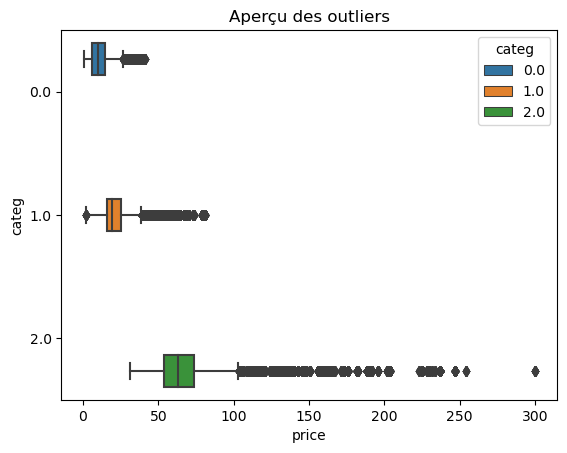

In [41]:
# Aperçu des prix outliers par boxplot

sns.boxplot(data=data_lapage,
            x='price', y='categ', hue='categ', orient="h")
plt.title("Aperçu des outliers")
plt.show()

In [42]:
# Calcul du Zscore pour distinguer les prix Outliers

data_lapage['price_zscore'] = (
    data_lapage['price']-data_lapage['price'].mean())/data_lapage['price'].std(ddof=0)
data_lapage.head()

,session_id,date_bis,date_annee,date_mois_annee,id_prod,price,categ,client_id,sex,birth,age,tranche_age,_merge,price_zscore
0,s_211425,2022-05-20,2022,2022-05,0_1518,4.18,0.0,c_103,f,1986,37,30-59,both,-0.724216
1,s_158752,2022-02-02,2022,2022-02,1_251,15.99,1.0,c_8534,m,1988,35,30-59,both,-0.079794
2,s_225667,2022-06-18,2022,2022-06,0_1277,7.99,0.0,c_6714,f,1968,55,30-59,both,-0.516320
3,s_52962,2021-06-24,2021,2021-06,2_209,69.99,2.0,c_6941,m,2000,23,18-29,both,2.866759
4,s_325227,2023-01-11,2023,2023-01,0_1509,4.99,0.0,c_4232,m,1980,43,30-59,both,-0.680018


In [43]:
print("Nous avons avec la méthode Zscore", '\033[91m', len(
    data_lapage[data_lapage['price_zscore'] >= 2]), ' prix considérés comme outliers')

outliers_z = data_lapage[data_lapage['price_zscore']
                         >= 2].sort_values('price_zscore', ascending=False)
outliers_z.head()

Nous avons avec la méthode Zscore  28268  prix considérés comme outliers


,session_id,date_bis,date_annee,date_mois_annee,id_prod,price,categ,client_id,sex,birth,age,tranche_age,_merge,price_zscore
615713,s_129351,2021-12-04,2021,2021-12,2_2,300.0,2.0,c_4958,m,1999,24,18-29,both,15.417439
76793,s_47558,2021-06-12,2021,2021-06,2_2,300.0,2.0,c_5237,m,1999,24,18-29,both,15.417439
36594,s_308301,2022-12-07,2022,2022-12,2_2,300.0,2.0,c_4958,m,1999,24,18-29,both,15.417439
143185,s_45088,2021-06-06,2021,2021-06,2_2,300.0,2.0,c_2467,f,1997,26,18-29,both,15.417439
341315,s_172373,2022-02-28,2022,2022-02,2_2,300.0,2.0,c_659,f,2001,22,18-29,both,15.417439


#### N’ayant pas d’informations complémentaires en ce qui concerne l’identité des différents produits, nous ne pouvons nous permettre de supprimer les prix considérés comme étant des outliers. Par conséquent nous allons les garder dans nos données pour les analyses futures. 

In [44]:
# Suppression des colonnes 'price_zscore' et '_merge'

data_lapage.drop(columns=['price_zscore', '_merge'], inplace=True)

In [45]:
# Colonne pour le nombre d'achat par client

data_lapage = data_lapage.merge(
    data_lapage.groupby('client_id').count()['date_bis'].reset_index().rename(
        columns={'date_bis': 'total_achat'}),
    how='left', on='client_id')

In [46]:
# Colonne pour le CA généré par client

data_lapage = data_lapage.merge(
    data_lapage.pivot_table(
        index='client_id', values='price',
        aggfunc='sum').reset_index().rename(
        columns={'price': 'total_genere'}),
    on='client_id', how='left')

In [47]:
# Dates de transaction la plus ancienne et la plus récente

print('Transactions du', str(data_lapage['date_bis'].min()), 'au', str(
    data_lapage['date_bis'].max()))

Transactions du 2021-03-01 au 2023-02-28


In [53]:
# Colonne pour le nombre d'achat mensuel

data_lapage['nb_achat_mensuel'] = round(data_lapage['total_achat'] / 12)

In [50]:
# Colonne pour le panier moyen

data_lapage['panier_moyen'] = round(
    data_lapage['total_genere']/data_lapage['total_achat'], 2)

In [51]:
data_lapage=data_lapage.drop_duplicates()

### Exportation du Dataframes 'data_lapage'

In [52]:
data_lapage.to_csv('data_lapage.csv', index=False)

[↟](#Sommaire)